### Model selection

After removing the outliers and replacing the wrong record with appoximately estimasted one, we got the appropriate data that suitable for data analysis. The next step comes naturally: selectling the variables and construct the model. 

Since there is linear relationship between BodyFat and some other variables, we consider construcy a linear model to predict the BodyFat. According to our previous linear naive model, the linear combination of certain variables can actually account for most of the information of BodyFat, we regard linear model as a reasonable choice.

By observing directily, we found there is strong colinearity among several predictors, the Variance Influntial Factor also bolster this conclusion. We need select a relatively small set of variables as predictors in the model.

Considering the severe colinearity in the model, and we want our replication as simple as possible (a.e. a off the shelf method for a non-statistician required a little inputs applied on the application). We use forward(empirically select less variables than backword) step-wise selection with AIC criterion which balance the fidelity and model capacity.

#####  Forward AIC selection

After selection, we have 4 variables:  ABDOMEN + WEIGHT + WRIST + BICEPS. Then we plot the figure to depict the correlation between them:

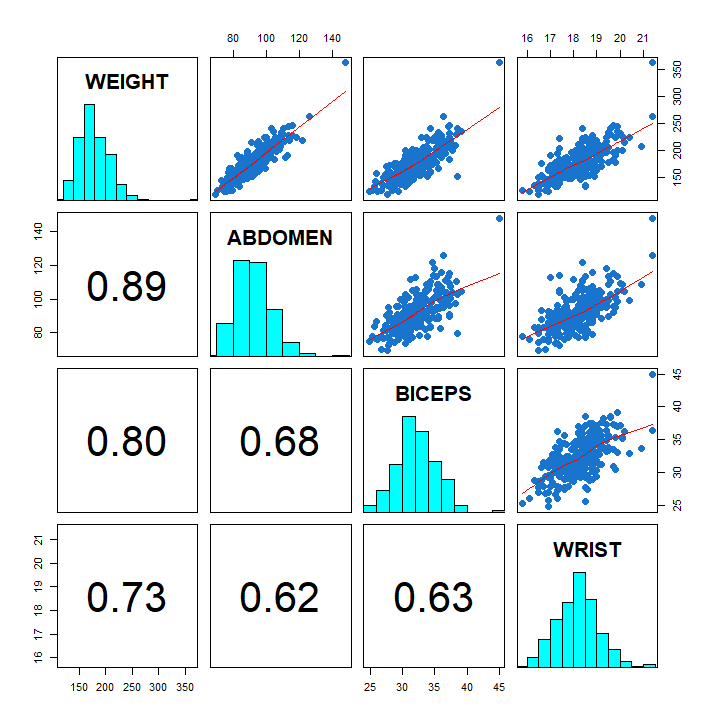

There is still colinearity among these 4 variables, we use **All Possible Subsets Methods** to select the best subset. We search all the possible subset pf variables as predictors, and compare different subsets with $R^2$, adjusted $R^2$ and $C_p$ criterion.

In [ ]:
library(leaps)
my.regsub <- function(matrix,y,nbest,method,nvmax=8){
  temp <- regsubsets(matrix,y,nbest=nbest,method=method,nvmax=nvmax)
  temp.mat <- cbind(summary(temp)$which,
                    summary(temp)$rsq,summary(temp)$rss,
                    summary(temp)$adjr2,summary(temp)$cp,
                    summary(temp)$bic)
  dimnames(temp.mat)[[2]] <- c(dimnames(summary(temp)$which)[[2]],
                               "rsq", "rss", "adjr2", "cp", "bic")
  return(temp.mat)
}


In [ ]:
N = 3
sele = my.regsub(data[-RMIndex,c(3,8,13,15)],y=data[-RMIndex,1],nbest=N,nvmax = N,method="exhaustive")
sele = sele[order(sele[,which(colnames(sele) == 'rsq')],decreasing = TRUE),]
rownames(sele) = NULL

sele

 | WEIGHT | ABDOMEN | BICEPS | WRIST | rsq  | rss      | adjr2 | cp     | bic     |
 |--------|---------|--------|-------|------|----------|-------|--------|---------|
 | 1      | 1       | 0      | 1     | 0.72 | 3803.96  | 0.72  | 6.35   | -294.85 |
 | 1      | 1       | 1      | 0     | 0.71 | 3945.07  | 0.71  | 15.45  | -285.85 |
 | 1      | 1       | 0      | 0     | 0.71 | 3979.64  | 0.71  | 15.68  | -289.21 |
 | 0      | 1       | 1      | 1     | 0.71 | 4011.4   | 0.7   | 19.73  | -281.74 |
 | 0      | 1       | 0      | 1     | 0.71 | 4011.97  | 0.71  | 17.76  | -287.21 |
 | 0      | 1       | 1      | 0     | 0.67 | 4486.63  | 0.67  | 48.38  | -259.59 |
 | 0      | 1       | 0      | 0     | 0.67 | 4569.2   | 0.67  | 51.7   | -260.6  |
 | 1      | 0       | 0      | 0     | 0.38 | 8574.12  | 0.37  | 310.01 | -105.13 |
 | 0      | 0       | 1      | 0     | 0.23 | 10607.89 | 0.22  | 441.19 | -52.56  |

As we can see, the result shows the best 2 variables are **weight** and **abdomen**, the best 3 variables are **weight** and **abdomen** and **wrist**. The additional **wrist** variable can only cause increasing of $R^2$ of no more than 0.01. We keep **weight** and **abdomen** as our final predictors in our linear model.

 Then we search all possible subsets among all our variables with size of each subset is 2 to verify our result. 

In [ ]:
sele = my.regsub(data[-RMIndex,2:15],y=data[-RMIndex,1],nbest=N,nvmax = N,method="exhaustive")
sele[order(sele[,which(colnames(sele) == 'rsq')],decreasing = TRUE),]
rownames(sele) = NULL
sele

| AGE | WEIGHT | HEIGHT | ADIPOSITY | NECK | CHEST | ABDOMEN | HIP | THIGH | KNEE | ANKLE | BICEPS | FOREARM | WRIST | rsq  | rss     | adjr2 | cp    | bic     |
|-----|--------|--------|-----------|------|-------|---------|-----|-------|------|-------|--------|---------|-------|------|---------|-------|-------|---------|
| 0   | 1      | 0      | 0         | 0    | 0     | 1       | 0   | 0     | 0    | 0     | 0      | 0       | 0     | 0.71 | 3979.64 | 0.71  | 19.01 | -289.21 |
| 0   | 0      | 0      | 0         | 0    | 0     | 1       | 0   | 0     | 0    | 0     | 0      | 0       | 1     | 0.71 | 4011.97 | 0.71  | 21.12 | -287.21 |
| 0   | 0      | 1      | 0         | 0    | 0     | 1       | 0   | 0     | 0    | 0     | 0      | 0       | 0     | 0.7  | 4133.4  | 0.7   | 29.06 | -279.85 |
| 0   | 1      | 0      | 0         | 0    | 0     | 1       | 0   | 0     | 0    | 0     | 0      | 0       | 1     | 0.72 | 3803.96 | 0.72  | 9.53  | -294.85 |
| 0   | 0      | 1      | 0         | 0    | 0     | 1       | 0   | 0     | 0    | 0     | 0      | 0       | 1     | 0.72 | 3830.16 | 0.72  | 11.24 | -293.16 |
| 1   | 0      | 0      | 0         | 0    | 0     | 1       | 0   | 0     | 0    | 0     | 0      | 0       | 1     | 0.72 | 3849.5  | 0.72  | 12.51 | -291.91 |

As we can see, the result coincide with our previous conclusion.

 Then we construct out final model.

In [ ]:
lm.final = lm(BODYFAT~WEIGHT+ABDOMEN+WRIST, data[-RMIndex,])
summary(lm.final)

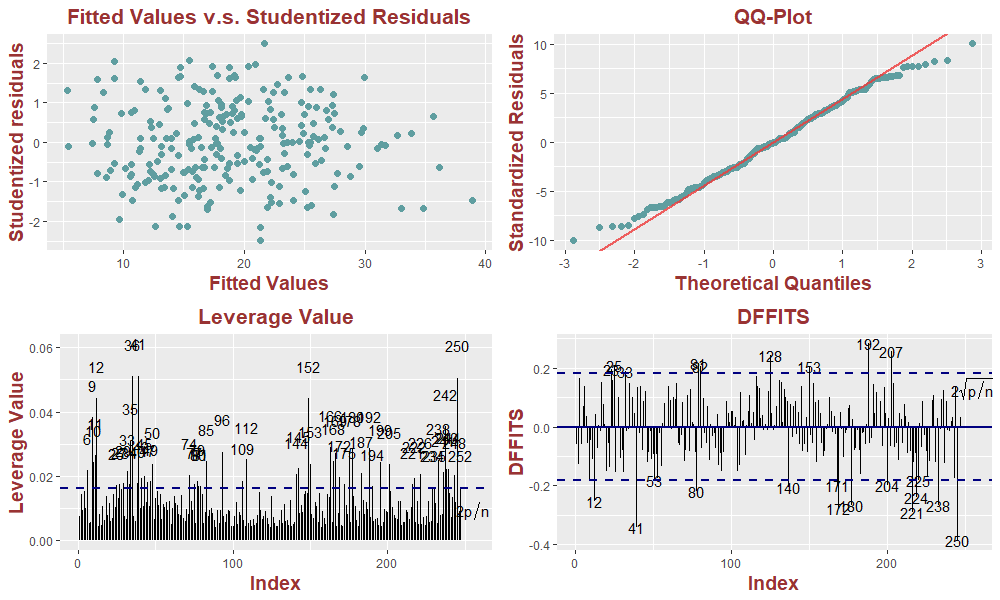

As we can see, the residual are randomly scattered around both side of x axis. The scatter plot didn't show any specific pattern. The QQplot shows the data has a heavy tail. We might need to construct boxcox transformation to meet the normality assumption.

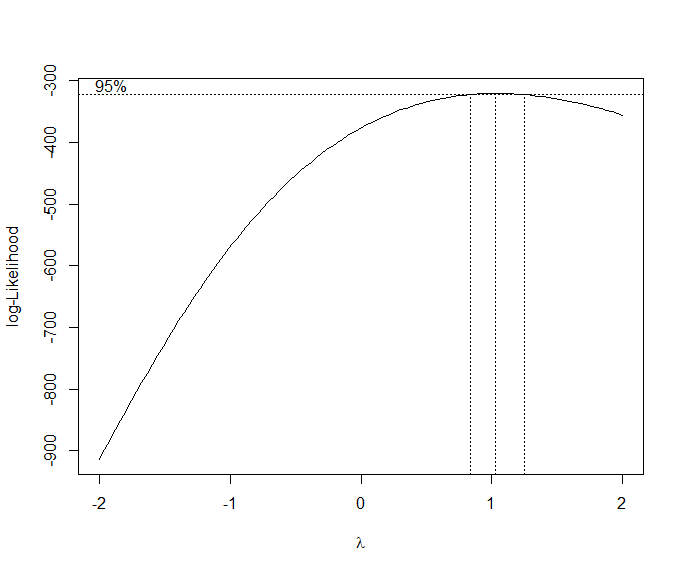

Since the boxcox didn't suggest any transformation on the data, we use our raw data and the model we got right now to analysis.